In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Mean Fill

In [2]:
# clean data
train = pd.read_csv('./data.csv') # 训练集的读取
train1 = train
train1=train1.fillna(train1.mean())
train1=train1.fillna('None') 
print('train set is filled with mean/none, sum NA=', sum(train1.isnull().sum()))

# build train set
y = train1['SalePrice']
train1 = train1.drop(['Id', 'SalePrice'], axis=1)
X=pd.get_dummies(train1) # Convert categorical variable into dummy/indicator variables

# train the model 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
print('set is splited into train, test:', X_train.shape, X_test.shape)
xg_reg = xgb.XGBRegressor(objective='reg:linear',
                          colsample_bytree=0.6,
                          learning_rate=0.01,
                          max_depth=8,
                          alpha=10,
                          n_estimators=700,
                          subsample=0.7,
                          random_state=123)
xg_reg.fit(X_train,y_train)

# model valuation 
pred = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
logrmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
print('rmse:', rmse, 'logrmse:', logrmse)

train set is filled with mean/none, sum NA= 0
set is splited into train, test: (1168, 303) (292, 303)
rmse: 24397.005804359607 logrmse: 0.11291591685262999


# Median Fill py27

In [32]:
# clean data
train = pd.read_csv('./data.csv') # 训练集的读取
train1 = train
train1=train1.fillna(train1.median())
train1=train1.fillna('None') 
print('train set is filled with mean/none, sum NA=', sum(train1.isnull().sum()))

# build train set
y = train1['SalePrice']
train1 = train1.drop(['Id', 'SalePrice'], axis=1)
X=pd.get_dummies(train1) # Convert categorical variable into dummy/indicator variables
#默认情况只对category and ojbect 进行 onehot 编码
# train the model 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
print('set is splited into train, test:', X_train.shape, X_test.shape)
xg_reg = xgb.XGBRegressor(objective='reg:linear',
                          colsample_bytree=0.6,
                          learning_rate=0.01,
                          max_depth=8,
                          alpha=10,
                          n_estimators=700,
                          subsample=0.7,
                          random_state=123)
xg_reg.fit(X_train,y_train)

# model valuation 
pred = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
logrmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
print('rmse:', rmse, 'logrmse:', logrmse)

train set is filled with mean/none, sum NA= 0
set is splited into train, test: (1168, 303) (292, 303)
rmse: 24377.995089907552 logrmse: 0.1129396317760244


In [4]:
print(train1.shape, X_train.shape, X_test.shape)

(1460, 79) (1168, 303) (292, 303)


# Correlation EDA

In [3]:
# 选择大于0.5的中度相关feature
# clean data
train = pd.read_csv('./data.csv') # 训练集的读取
train1 = train
train1=train1.fillna(train1.median())
train1=train1.fillna('None') 
top_corr_feature = train1.corr()['SalePrice']
top_corr_feature = top_corr_feature[abs(top_corr_feature)>0.5]
print(top_corr_feature)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


> **可以看到一共有10个feature > 0.5, 这里也应该考略中度负相关, 但实际上没有小于-0.5的feature，因此忽略不计**

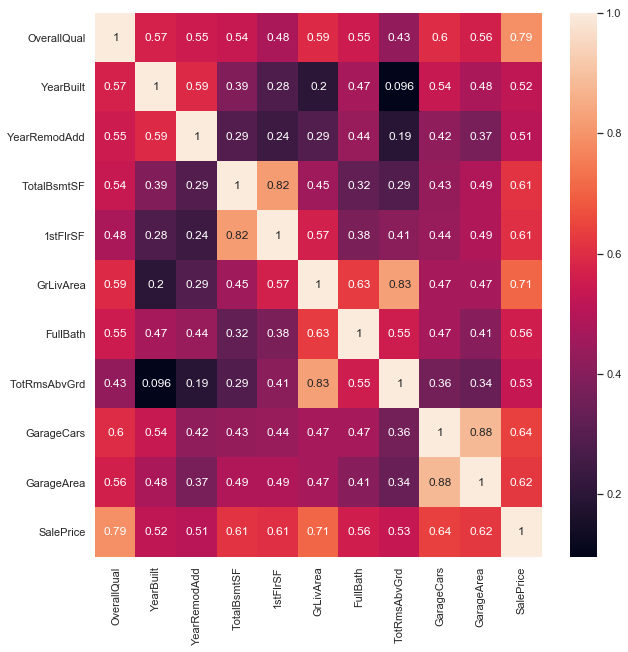

In [24]:
top_corr_matrix = train1[top_corr_feature.index].corr()
fig, axs = plt.subplots(figsize=(10,10))
# heatmap plot1
sns.heatmap(top_corr_matrix, vmax=1, annot=True)

> 最大相关性矩阵可得，以下10个自变量会对SalePrice造成较大影响，包括：
'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'

>考虑到以下两个方面：

>GarageCars和GarageArea反应的应该是一个意思，（GarageCars: Size of garage in car capacity；GarageArea: Size of garage in square feet）故选取相关系数更大的GarageCars作为主要特征

>'TotalBsmtSF'和 '1stFlrSF'一个是地下室面积，一个是一层面积，两个features与SalePrice相关系数均一样，因此，选其中一个就可以，这里我们选择'TotalBsmtSF'作为主要特征变量。

>故筛选完，剩下'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars' 8个变量

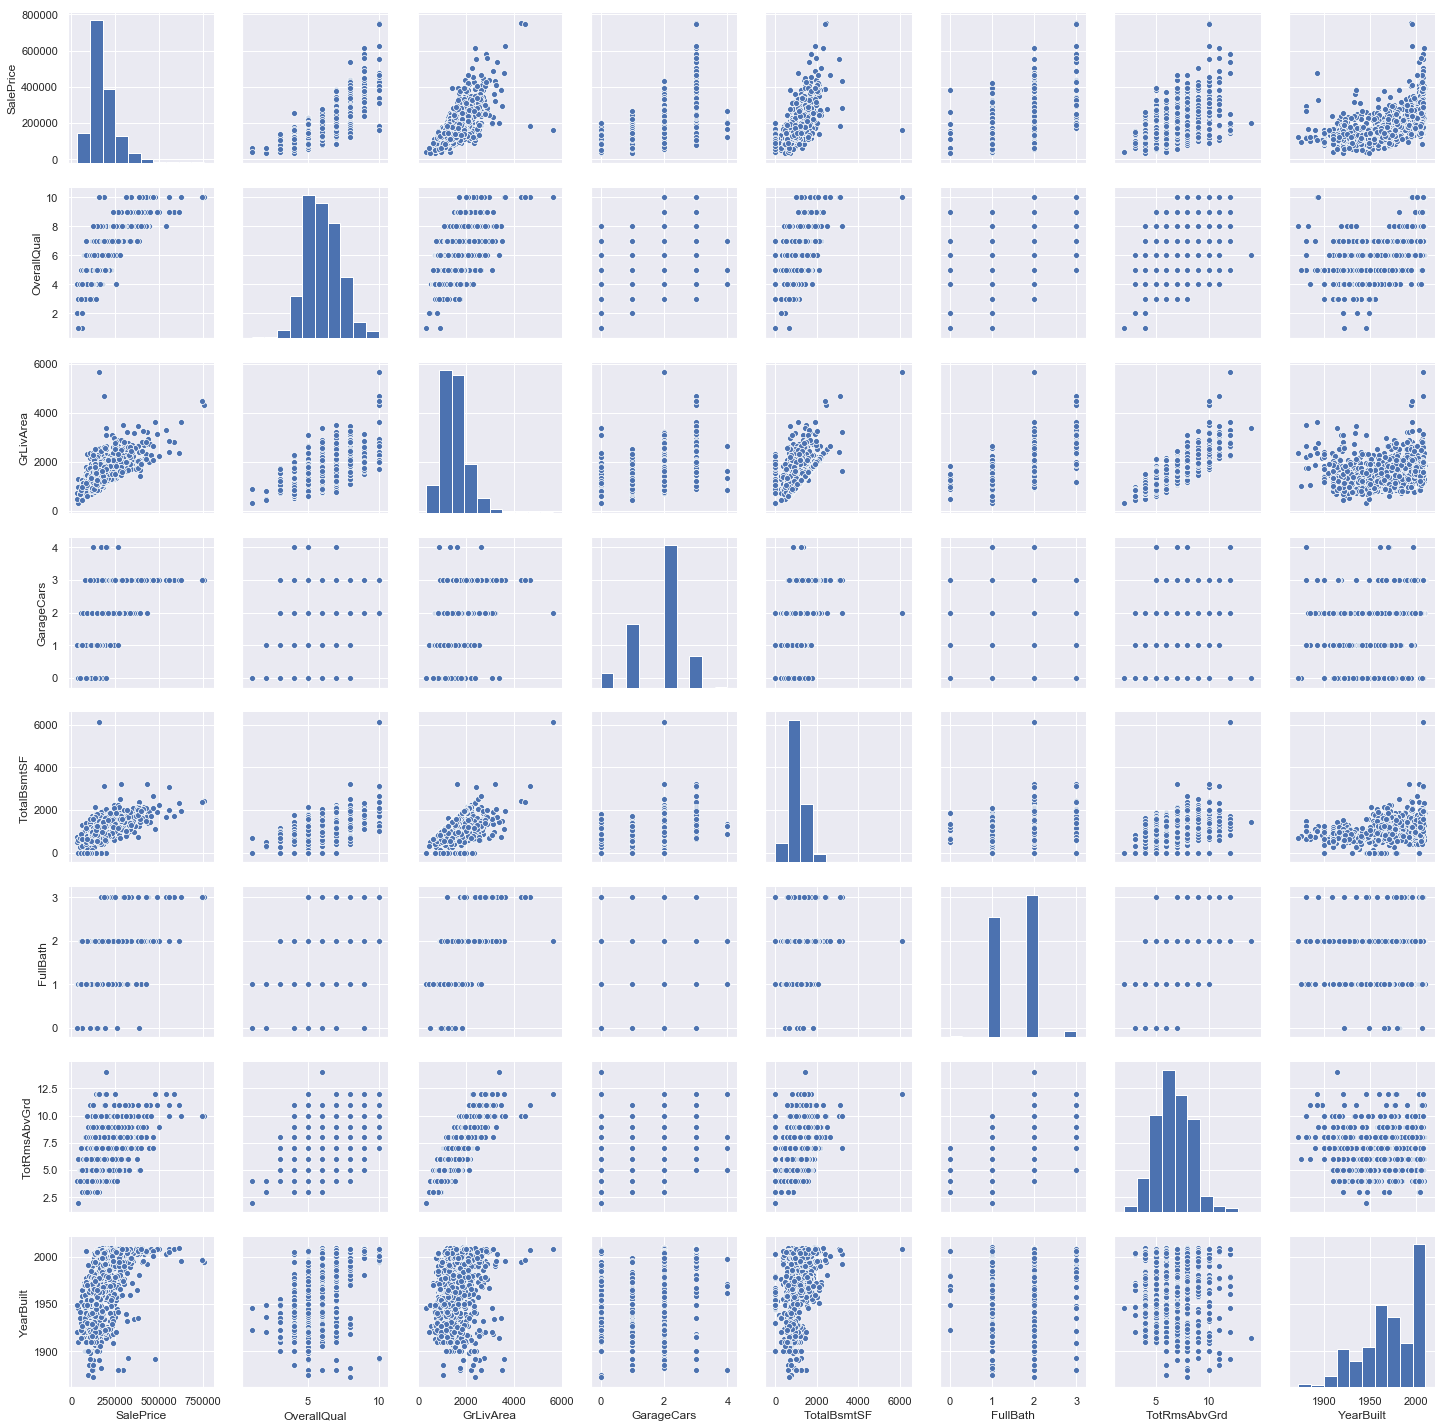

In [26]:
# scatter plot2
cols = ['SalePrice','OverallQual','GrLivArea', 
        'GarageCars','TotalBsmtSF', 'FullBath', 
        'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train1[cols], height = 2.5)